### Introduction

Credit card fraud is a growing problem in the financial industry and it can cause significant losses for both consumers and businesses. The importance of accurately detecting fraudulent transactions cannot be overstated. In this analytics project, we will explore various techniques to identify credit card fraud by analyzing transaction data and identifying patterns and anomalies. The goal of this project is to develop a model that can accurately identify fraud, minimize false positive rates and prevent financial losses. The findings of this project will not only be beneficial for financial institutions but also for consumers who can take proactive measures to protect their personal and financial information from being compromised.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Data Exploration

Importing the data frame into pandas and displaying the first five rows.

In [2]:
raw_df = pd.read_csv('card_transdata.csv')
raw_df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [3]:
df = raw_df.copy()

df.drop_duplicates(inplace=True)
print("Duplicated values dropped succesfully")
print("*" * 100)

Duplicated values dropped succesfully
****************************************************************************************************


There are 8 columns all with data type float.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 68.7 MB


In [5]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Count of number of fraud transactions detected in data set.
# 87403 are fraud with 912597 transactions as legitimate.
counts = df['fraud'].value_counts()
print(counts)


0.0    912597
1.0     87403
Name: fraud, dtype: int64


There are instances when a chip and pin can be required for a transaction. This would create double the security as a potential fraudulant transaction may not have the necessary information of both. The chip is a physical pin and the pin is a personal identification number the credit card holder creates.

In the data frame there is currently 35053 data points where a chip and pin was used for the transaction.

In [7]:
filtered_df = df.loc[(df['used_chip'] == 1.0) & (df['used_pin_number'] == 1.0)]
filtered_df.shape

(35053, 8)

Creating a new column that utilizes both if a chip and a pin was used may yeild interesting results as dual authintication tends to be more secure thus reducing the likely hood that a transaction is fraudulant. 

In [8]:
df['double_secure'] = np.where((df['used_chip'] == 1.0) & (df['used_pin_number'] == 1.0), 1.0, 0.0)

The new feature of double_secure is of data type float and there are no non null values.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
 8   double_secure                   1000000 non-null  float64
dtypes: float64(9)
memory usage: 76.3 MB


In [10]:
counts = df['double_secure'].value_counts()
print(counts)

0.0    964947
1.0     35053
Name: double_secure, dtype: int64


By taking the columns where there is the dual authentication of a chip and pin being used we can see how many of the tranasction were fraudulant.

In [11]:
# Select the rows where both values in columns 'double_secure' and 'fraud' equal 1.0
selected_rows = df[(df['double_secure'] == 1.0) & (df['fraud'] == 1.0)]

# Count the number of selected rows
count = len(selected_rows)

print("The number of fraudulant transaction from the dual authenticated transactions is: ", count)

The number of fraudulant transaction from the dual authenticated transactions is:  9


In [12]:
# Select the rows where both values in columns 'double_secure' and 'fraud' equal 1.0
selected_rows = df[(df['double_secure'] == 1.0) & (df['fraud'] == 0.0)]

# Count the number of selected rows
new_count = len(selected_rows)

print("Number of rows where values in columns 'double_secure' equal 1.0 and 'fraud' equal 0.0:", new_count)

Number of rows where values in columns 'double_secure' equal 1.0 and 'fraud' equal 0.0: 35044


Calculating the conditional probability such that the probability of fraud given a transaction is dual authenticated yields.

The conditional probability formula:

$$P(fraud|double secure) = \frac{P(fraud \cap double secure)}{P(double secure)}$$

In [13]:
def conditional_probability(p_a_and_b, p_b):
    p_a_given_b = p_a_and_b / p_b
    return p_a_given_b

In [14]:
p_a_and_b = count/df.shape[0]
p_b = 35053/df.shape[0]

result = round(conditional_probability(p_a_and_b, p_b),6)
print("P(fraud|double_secure) = ", result)

P(fraud|double_secure) =  0.000257


From our data it can be computed that if a transaction has dual authentication meaning a chip and pin were both used for a transaction, then the probability of the transaction being fradulant is 0.0257 %. 

### Data Visualization

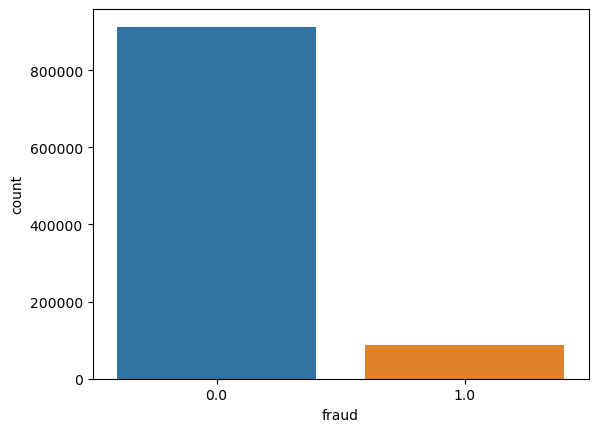

In [15]:
sns.countplot(x ='fraud', data = df)
 
# Show the plot
plt.show()

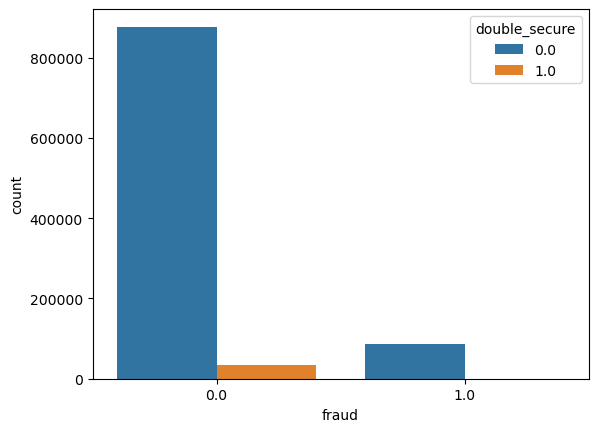

In [16]:
sns.countplot(x ='fraud', data = df, hue = 'double_secure')
 
# Show the plot
plt.show()

In [17]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,double_secure
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0,0.0


From the scatter plot we can see there is relatively little to no correlation betweeen the two features. What can be observed is most transactions occur from 0 to 2000 between both distance from home and distance from last transaction. 

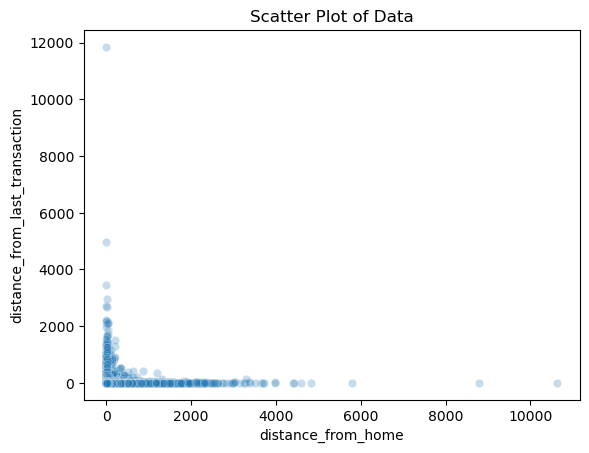

In [18]:
sns.scatterplot(x='distance_from_home', y='distance_from_last_transaction', data=df, alpha=0.25)
plt.title('Scatter Plot of Data')
plt.xlabel('distance_from_home')
plt.ylabel('distance_from_last_transaction')
plt.show()

From the correlation heat map it can be observed the highest correlated variable to fraud is the ratio to median purchase price. This makes rationale sense as individuals typically spend a unique average per transaction. What would be a good indicator of fraud are purchases significantly above or below an average customers purchase amount. In addition, the next highest correlations are distance from home and online orders. 

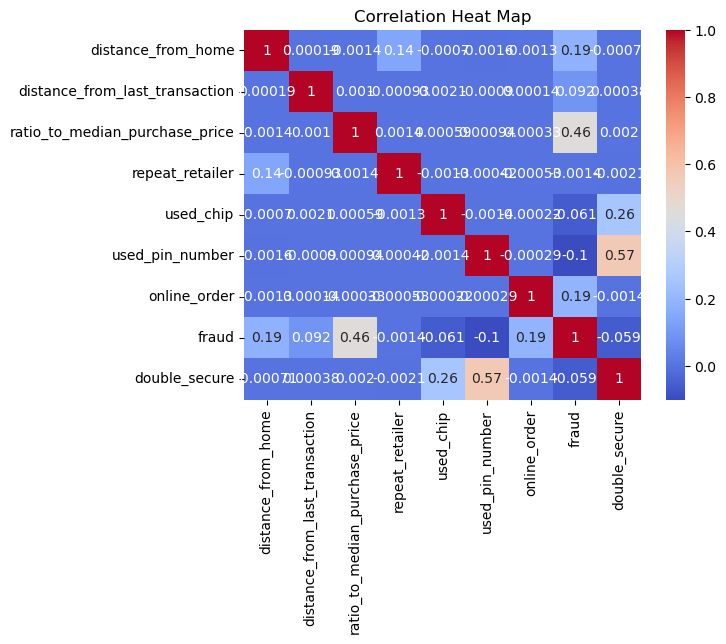

In [19]:
corr = df.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heat Map')
plt.show()

### Convert data into Numpy Array

In [20]:
scale_df = df[['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price']]

binary_df = df[['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order', 'double_secure', 'fraud']]

In [21]:
data = scale_df.values

print(type(data))
print('The size of the numpy array is:', data.shape)

<class 'numpy.ndarray'>
The size of the numpy array is: (1000000, 3)


In [22]:
binary_data = binary_df.values

print(type(data))
print('The size of the numpy array is:', binary_data.shape)

<class 'numpy.ndarray'>
The size of the numpy array is: (1000000, 6)


### Standardize the Data

In [23]:
from sklearn.preprocessing import StandardScaler

def scale_data(data):
    scaler = StandardScaler()
    return scaler.fit_transform(data)

In [24]:
scaled_data = scale_data(data)

In [25]:
scaled_data

array([[ 0.47788202, -0.18284892,  0.04349141],
       [-0.24160679, -0.18809398, -0.18930045],
       [-0.3293694 , -0.16373307, -0.49881185],
       ...,
       [-0.36264968, -0.13790278, -0.57369398],
       [-0.34209827, -0.1855234 , -0.48162807],
       [ 0.48140344, -0.18257921, -0.51338354]])

We need to rejoin binary data to the scaled data. The numpy array should be (1000000, 9).

In [26]:
data = np.column_stack((scaled_data, binary_data))

print("The size of the numpy array is", data.shape)

The size of the numpy array is (1000000, 9)


Displaying first five rows of the standardized data. 

In [27]:
print(data[:5, :])

[[ 0.47788202 -0.18284892  0.04349141  1.          1.          0.
   0.          0.          0.        ]
 [-0.24160679 -0.18809398 -0.18930045  1.          0.          0.
   0.          0.          0.        ]
 [-0.3293694  -0.16373307 -0.49881185  1.          0.          0.
   1.          0.          0.        ]
 [-0.37285438  0.02180561 -0.52204812  1.          1.          0.
   1.          0.          0.        ]
 [ 0.26857229 -0.17296828  0.14237287  1.          1.          0.
   1.          0.          0.        ]]


### Split data into training and testing

Stratified splitting means that when you generate a training / validation dataset split, it will attempt to keep the same percentages of classes in each split.

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# Create a sample data set
X = data[:, 0:9]
y = data[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

print("y_train:", y_train)
print("y_test:", y_test)

y_train: [0. 0. 0. ... 1. 0. 0.]
y_test: [0. 0. 0. ... 0. 0. 1.]


In [29]:
from sklearn.ensemble import RandomForestClassifier # for classification
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [31]:
# calculate precision, recall, F1-score, and support
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred, average='binary')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Precision: 1.0
Recall: 1.0
F1 Score: 1.0


If precision, recall, and F1 score are all 1.0, it means that the model has a perfect performance on the test set. It means that the model is making no false positive or false negative predictions, and it is correctly identifying all positive instances and correctly rejecting all negative instances.

While a perfect score on precision, recall, and F1 is a great indicator of good model performance, it is important to keep in mind that it is possible for a model to achieve perfect scores and still be overfitting the data. This can happen if the test set is very small, or if the test set is too similar to the training set. In these cases, it is possible for the model to have memorized the training data and perform poorly on new, unseen data.

In [32]:
from sklearn.model_selection import cross_val_score

# create your model
clf = RandomForestClassifier(n_estimators=100)

# perform cross-validation with 10 folds
scores = cross_val_score(clf, X, y, cv=5)

# print the average accuracy score
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 1.00 (+/- 0.00)


If the scores from cross-validation are all 1.0, it means that the model is performing exceptionally well on the data, achieving a perfect accuracy score in each fold. A high cross-validation score is a strong indicator that the model is generalizing well to new, unseen data, and is not overfitting the training data.

However, even if the cross-validation scores are all 1.0, it is still important to validate the model on a separate test set. The test set should be held out from the training and validation process and only used for final evaluation. This will give you a more robust estimate of the model's performance on unseen data.

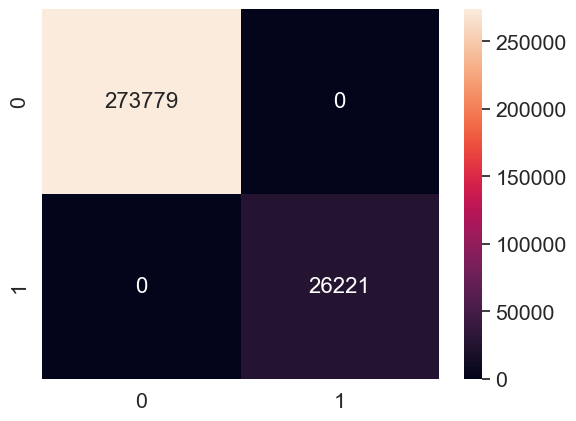

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt="d")

plt.show()

### Conclusion

While the random forest classification model can predict near perfect results, this likely arises from the fact that the data set is imbalanced. Over 9/10 of the data is non-fraudulant which regardless of a model if one were to guess non-fraudulant for every test point one would be correct 91% of the time. One interesting insight was the conditional probability of the data set. It was found that if a transaction was processed using a chip and a pin the probability of it being fraudulant was 0.0257 %. From a credit card company standpoint, requiring dual authorization for a transaction of a very large purchase price may significantly reduce the number of fraud the company may be liable for. 

A quick glance of the imbalance in the data set for the predicted classification variable.

In [34]:
counts = df['fraud'].value_counts()
print(counts)

0.0    912597
1.0     87403
Name: fraud, dtype: int64


In [35]:
result = round(( 912597 / df.shape[0] ), 3)
print('The percentage of non-fradulant transactions in the data set is:', result, "%")

The percentage of non-fradulant transactions in the data set is: 0.913 %


### Post Factum

An attempt at rebalancing the data set yields a similar accuracy in the Random Forest Classification model.

In [36]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,double_secure
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0,0.0


While the random forest classification model can predict near perfect results, this likely arises from the fact that the data set is imbalanced. Over 9/10 of the data is non-fraudulant which regardless of a model if one were to guess non-fraudulant for every test point one would be correct 91% of the time. One interesting insight was the conditional probability of the data set. It was found that if a transaction was processed using a chip and a pin the probability of it being fraudulant was 0.0257 %. From a credit card company standpoint, requiring dual authorization for a transaction of a very large purchase price may significantly reduce the number of fraud the company may be liable for. 

In [37]:
#non fraudalent cases 
mask = df['fraud'] == 0.0 
sample_df = df[mask]
sample_df.shape[0]

912597

In [38]:
# Set the number of rows to be kept
keep_rows = 90000

# Randomly select the rows to be kept
balanced_df = sample_df.sample(n=keep_rows, replace=False)

In [39]:
balanced_df.shape[0]

90000

In [40]:
# # Concatenate the dataframes along the rows
mask = df['fraud'] == 1.0
fraud_df = df[mask]

In [41]:
new_df = pd.concat([fraud_df, balanced_df])

In [42]:
new_df.shape[0]

177403

In [43]:
## # Shuffle the rows of the concatenated dataframe
new_df = new_df.sample(frac=1).reset_index(drop=True)
counts = new_df['fraud'].value_counts()
print(counts) 

0.0    90000
1.0    87403
Name: fraud, dtype: int64


In [44]:
new_df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,double_secure
0,6.610786,0.124338,0.976709,1.0,1.0,0.0,0.0,0.0,0.0
1,4.041707,7.685135,0.321138,1.0,0.0,0.0,1.0,0.0,0.0
2,2.563637,4.733689,5.572324,1.0,0.0,0.0,1.0,1.0,0.0
3,23.010275,0.165276,0.623648,1.0,0.0,0.0,0.0,0.0,0.0
4,21.942075,68.512035,16.199663,1.0,1.0,0.0,0.0,1.0,0.0


In [45]:
df = new_df.copy()


In [46]:
scale_df = df[['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price']]

binary_df = df[['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order', 'double_secure', 'fraud']]

In [47]:
data = scale_df.values

print(type(data))
print('The size of the numpy array is:', data.shape)

<class 'numpy.ndarray'>
The size of the numpy array is: (177403, 3)


In [48]:
binary_data = binary_df.values

print(type(data))
print('The size of the numpy array is:', binary_data.shape)

<class 'numpy.ndarray'>
The size of the numpy array is: (177403, 6)


In [49]:
from sklearn.preprocessing import StandardScaler

def scale_data(data):
    scaler = StandardScaler()
    return scaler.fit_transform(data)

In [50]:
scaled_data = scale_data(data)

In [51]:
scaled_data

array([[-0.36548128, -0.22644526, -0.57035107],
       [-0.39039302, -0.02179989, -0.70854971],
       [-0.40472552, -0.10168563,  0.39843535],
       ...,
       [-0.25301529, -0.06799725, -0.59088341],
       [-0.39706274, -0.09054665, -0.69630816],
       [-0.11406888,  2.3673731 , -0.64827251]])

In [52]:
data = np.column_stack((scaled_data, binary_data))

print("The size of the numpy array is", data.shape)

The size of the numpy array is (177403, 9)


In [53]:
print(data[:5, :])

[[-0.36548128 -0.22644526 -0.57035107  1.          1.          0.
   0.          0.          0.        ]
 [-0.39039302 -0.02179989 -0.70854971  1.          0.          0.
   1.          0.          0.        ]
 [-0.40472552 -0.10168563  0.39843535  1.          0.          0.
   1.          0.          1.        ]
 [-0.20645929 -0.22533721 -0.64477857  1.          0.          0.
   0.          0.          0.        ]
 [-0.21681737  1.6245799   2.63874971  1.          1.          0.
   0.          0.          1.        ]]


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# Create a sample data set
X = data[:, 0:9]
y = data[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("y_train:", y_train)
print("y_test:", y_test)

y_train: [1. 1. 1. ... 1. 0. 0.]
y_test: [0. 1. 0. ... 1. 0. 0.]


In [55]:
from sklearn.ensemble import RandomForestClassifier # for classification
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

In [56]:
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [57]:
# calculate precision, recall, F1-score, and support
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred, average='binary')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Precision: 1.0
Recall: 1.0
F1 Score: 1.0
